### Data pre-processing

In [38]:
import sklearn
assert sklearn.__version__ >= "0.2"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
pokemon = pd.read_csv('pokemon_alopez247.csv')

In [40]:
pokemon['Type_2'].fillna("None", inplace = True)
pokemon['Egg_Group_2'].fillna("None", inplace = True)
pokemon['Pr_Male'].fillna(999, inplace = True)

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [41]:
pokemon.drop(['Number', 'Name'], axis=1, inplace=True)

In [42]:
numerical_cols = list(pokemon.select_dtypes(include='number').columns)
categorical_cols = list(pokemon.select_dtypes(exclude='number').columns)

In [43]:
pokemon[categorical_cols] = OrdinalEncoder().fit_transform(pokemon[categorical_cols]).astype(int)

In [44]:
pokemon = pd.DataFrame(MinMaxScaler().fit_transform(pokemon), columns=pokemon.columns)

In [45]:
pokemon_x, pokemon_y = pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary']
x_train, x_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size = 0.2, random_state = 42)

In [46]:
pokemon.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,0.529412,0.777778,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,0.258065,0.0,...,0.333333,1.0,0.000876,0.714286,0.461538,0.0,0.042361,0.007159,0.166667,0.692308
1,0.529412,0.777778,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,0.354839,0.0,...,0.333333,1.0,0.000876,0.714286,0.461538,0.0,0.061806,0.013580,0.166667,0.692308
2,0.529412,0.777778,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,0.483871,0.0,...,0.333333,1.0,0.000876,0.714286,0.461538,1.0,0.132639,0.105169,0.166667,0.692308
3,0.352941,0.666667,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,0.387097,0.0,...,0.777778,1.0,0.000876,0.714286,0.153846,0.0,0.035417,0.008843,0.166667,0.000000
4,0.352941,0.666667,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,0.483871,0.0,...,0.777778,1.0,0.000876,0.714286,0.153846,0.0,0.068750,0.019897,0.166667,0.000000


In [47]:
import seaborn as sns

def plot_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted isLengendary')
    ax.set_ylabel('Actual Legendary Category');

    # ticket labels - list must be in numerical order
    ax.xaxis.set_ticklabels(['Not Legendary','Legendary'])
    ax.yaxis.set_ticklabels(['Not Legendary','Legendary'])

    # display the visualization of the Confusion Matrix.
    plt.show()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

# helper function:
def calculate_metrics(matrix,y_test,predicted):
    # Using the method evalMetric function defined in Week 3 to calculate accuracy, precision, recall, and f-1
    
    #importing accuracy_score, precision_score, recall_score, f1_score
    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predicted, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predicted, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predicted, average='weighted')))
    
    # Print the TP, TN, FP, FN
    TP = matrix[0,0]
    FN = matrix[0,1]
    FP = matrix[1,0]
    TN = matrix[1,1]

    print("TP: " + str(TP))
    print("FN: " + str(FN))
    print("FP: " + str(FP))
    print("TN: " + str(TN))

    # Calculating the specificity = TN/(TN+TP)
    specificity = TN/(TN+TP)
    print("Specificity: " + str(specificity))

    # Calculating the sensitivity = TP/(TP+FN)
    sensitivity = TP/(TP+FN)
    print("Sensitivity: " + str(sensitivity))

    # calculating the AUC
    fpr, tpr, threshold = roc_curve(y_test, predicted)
    mul_auc = auc(fpr, tpr)
    print("The AUC is: " + str(mul_auc))

In [49]:
# Helper Function:
def cross_val_arch(n_split,arch):
    X_train, X_test, y_train, y_test = train_test_split(pokemon_x,pokemon_y,train_size = 0.9, random_state=10)
    strtfdKFold = StratifiedKFold(n_splits=n_split)
    kfold = strtfdKFold.split(X_train, y_train)
    scores = []

    for k, (train, test) in enumerate(kfold):
        arch.fit(X_train.iloc[train, :], y_train.iloc[train])
        predict = arch.predict(X_train.iloc[train, :])
        score = arch.score(X_train.iloc[test, :], y_train.iloc[test])
        scores.append(score)
        print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
        matrix = confusion_matrix(y_train.iloc[train], predict)
        calculate_metrics(matrix,y_train.iloc[train],predict)
        plot_matrix(matrix)
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()



### Lab 10: Multilayer Perceptron

Fold:  1, Training/Test Split Distribution: [545  38], Accuracy: 1.000
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 539
FN: 6
FP: 0
TN: 38
Specificity: 0.0658578856152513
Sensitivity: 0.9889908256880734
The AUC is: 0.9944954128440366


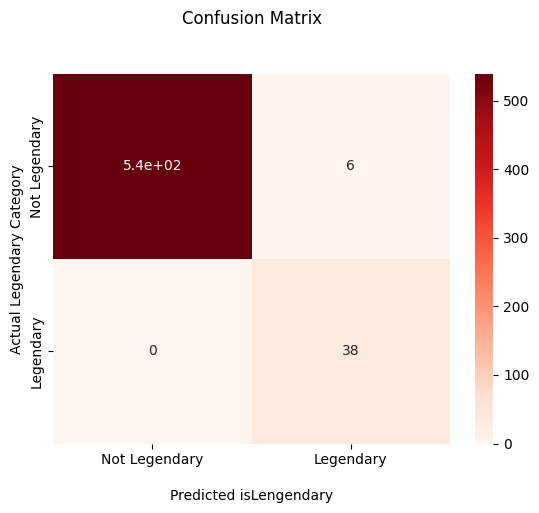

Fold:  2, Training/Test Split Distribution: [545  38], Accuracy: 0.969
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 542
FN: 3
FP: 6
TN: 32
Specificity: 0.05574912891986063
Sensitivity: 0.9944954128440368
The AUC is: 0.9183003380009657


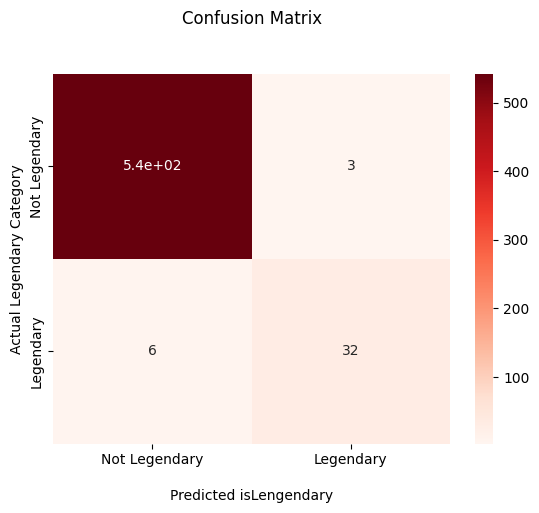

Fold:  3, Training/Test Split Distribution: [545  38], Accuracy: 0.985
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 540
FN: 5
FP: 2
TN: 36
Specificity: 0.0625
Sensitivity: 0.9908256880733946
The AUC is: 0.9690970545630131


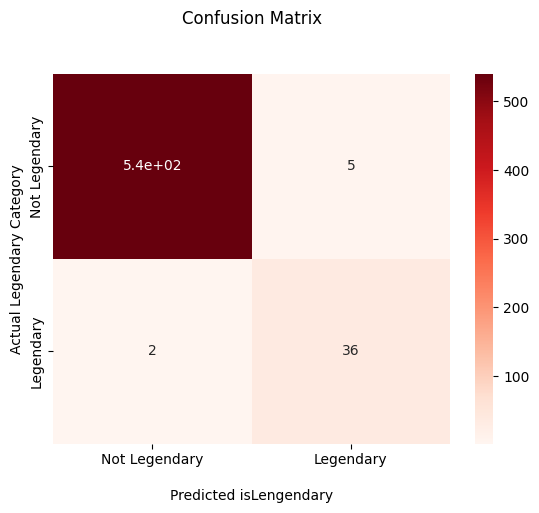

Fold:  4, Training/Test Split Distribution: [545  38], Accuracy: 0.969
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 532
FN: 13
FP: 0
TN: 38
Specificity: 0.06666666666666667
Sensitivity: 0.9761467889908257
The AUC is: 0.9880733944954129


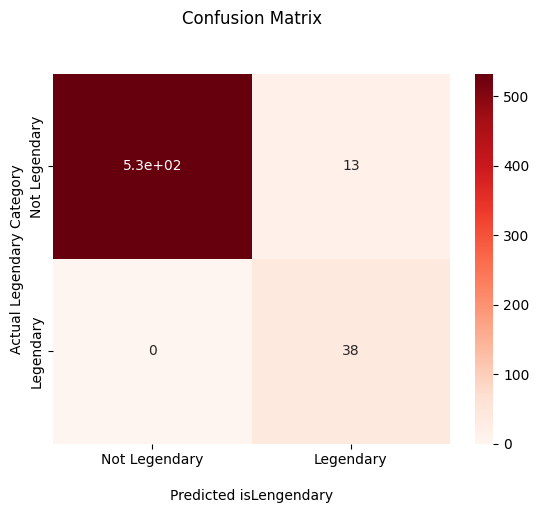

Fold:  5, Training/Test Split Distribution: [545  38], Accuracy: 0.969
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 543
FN: 2
FP: 7
TN: 31
Specificity: 0.05400696864111498
Sensitivity: 0.9963302752293578
The AUC is: 0.9060598744567842


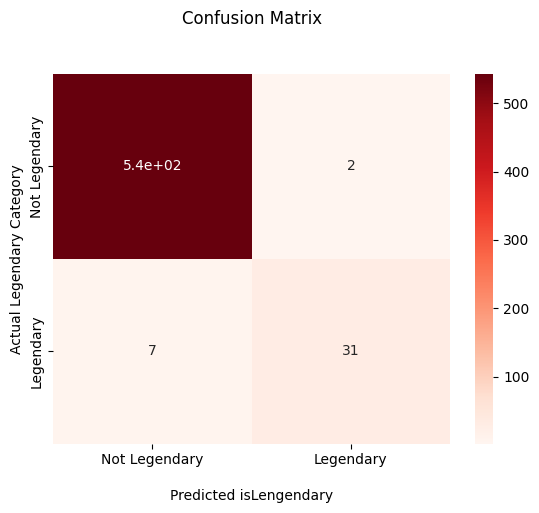

Fold:  6, Training/Test Split Distribution: [545  38], Accuracy: 0.985
Weighted Precision: 0.98
Weighted Recall: 0.97
Weighted F1-score: 0.97
TP: 527
FN: 18
FP: 0
TN: 38
Specificity: 0.06725663716814159
Sensitivity: 0.9669724770642202
The AUC is: 0.9834862385321101


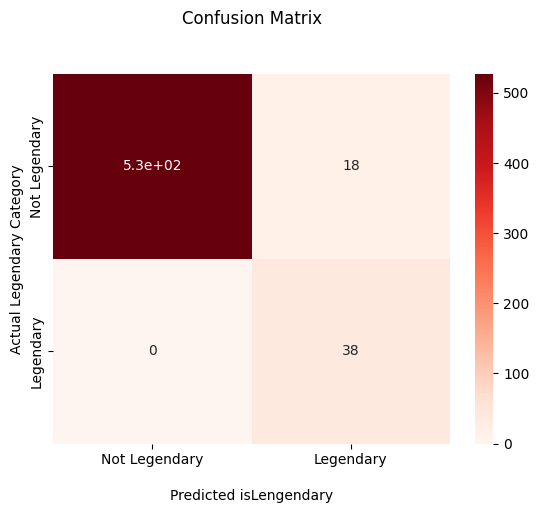

Fold:  7, Training/Test Split Distribution: [546  37], Accuracy: 0.985
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.97
TP: 545
FN: 1
FP: 13
TN: 24
Specificity: 0.0421792618629174
Sensitivity: 0.9981684981684982
The AUC is: 0.8234085734085734


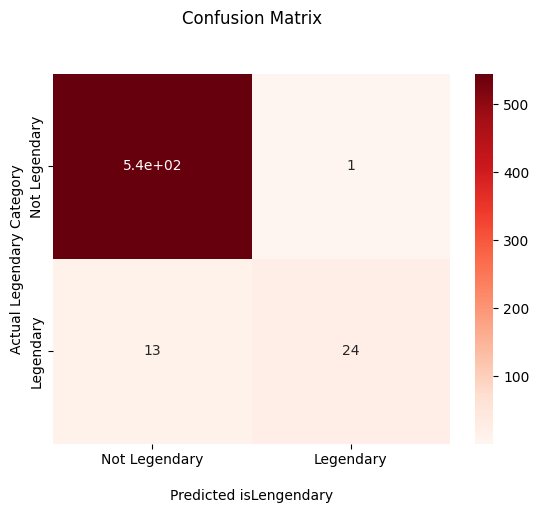

Fold:  8, Training/Test Split Distribution: [546  37], Accuracy: 0.985
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 542
FN: 4
FP: 4
TN: 33
Specificity: 0.057391304347826085
Sensitivity: 0.9926739926739927
The AUC is: 0.9422829422829423


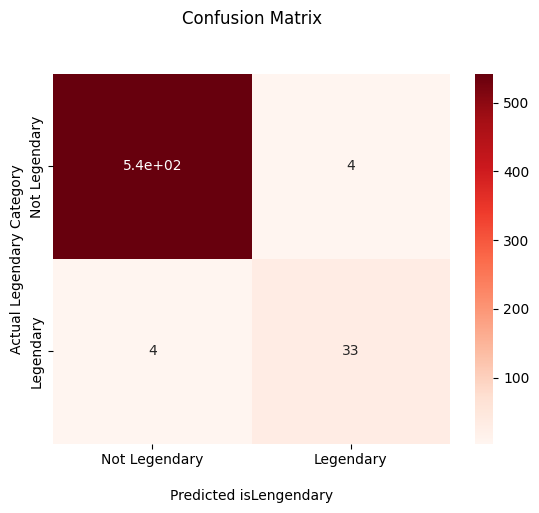

Fold:  9, Training/Test Split Distribution: [546  38], Accuracy: 0.984
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 538
FN: 8
FP: 0
TN: 38
Specificity: 0.06597222222222222
Sensitivity: 0.9853479853479854
The AUC is: 0.9926739926739927


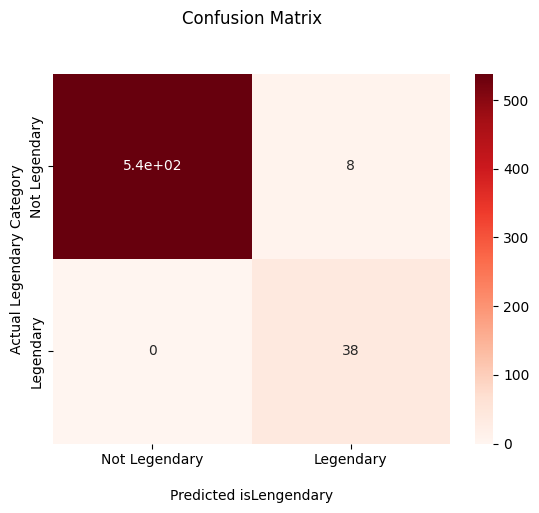

Fold: 10, Training/Test Split Distribution: [546  38], Accuracy: 1.000
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 540
FN: 6
FP: 1
TN: 37
Specificity: 0.06412478336221837
Sensitivity: 0.989010989010989
The AUC is: 0.9813475997686525


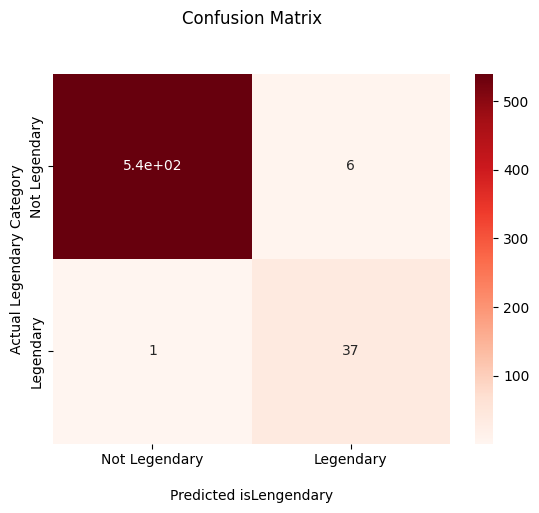



Cross-Validation accuracy: 0.983 +/- 0.011


In [50]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pokemon_x,pokemon_y,train_size = 0.9, random_state=10)

 
per_clf = Perceptron(max_iter=100, tol=1e-1)

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    per_clf.fit(X_train.iloc[train, :], y_train.iloc[train])
    predict = per_clf.predict(X_train.iloc[train, :])
    score = per_clf.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    matrix = confusion_matrix(y_train.iloc[train], predict)
    calculate_metrics(matrix,y_train.iloc[train],predict)
    plot_matrix(matrix)
    
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#### Initializing 6 Architectures


--------ARCH1--------
Fold:  1, Training/Test Split Distribution: [303  21], Accuracy: 0.065
Weighted Precision: 0.00
Weighted Recall: 0.06
Weighted F1-score: 0.01
TP: 0
FN: 303
FP: 0
TN: 21
Specificity: 1.0
Sensitivity: 0.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


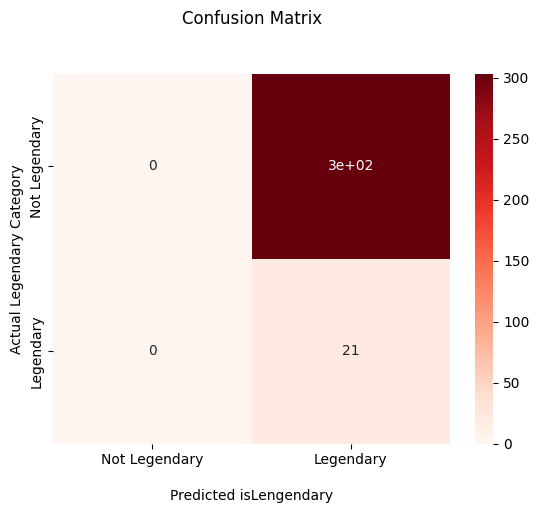

Fold:  2, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


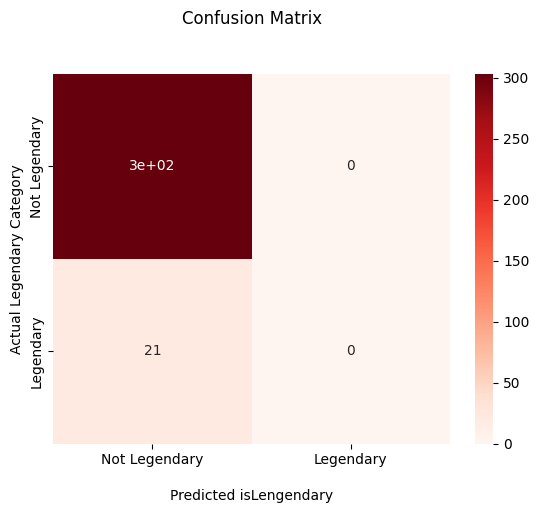



Cross-Validation accuracy: 0.500 +/- 0.435



--------ARCH2--------
Fold:  1, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


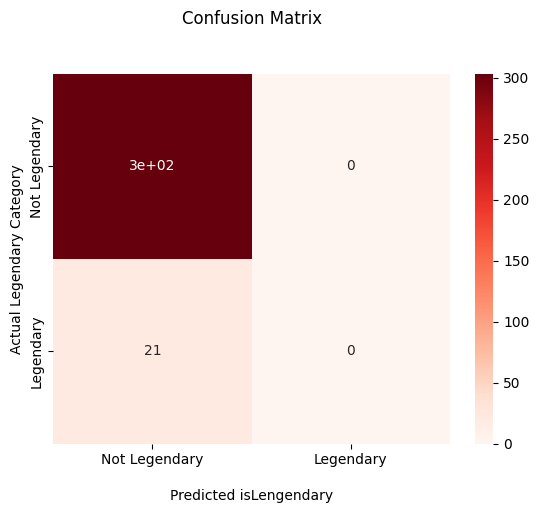

Fold:  2, Training/Test Split Distribution: [303  21], Accuracy: 0.062
Weighted Precision: 0.32
Weighted Recall: 0.06
Weighted F1-score: 0.01
TP: 1
FN: 302
FP: 2
TN: 19
Specificity: 0.95
Sensitivity: 0.0033003300330033004
The AUC is: 0.45403111739745405


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


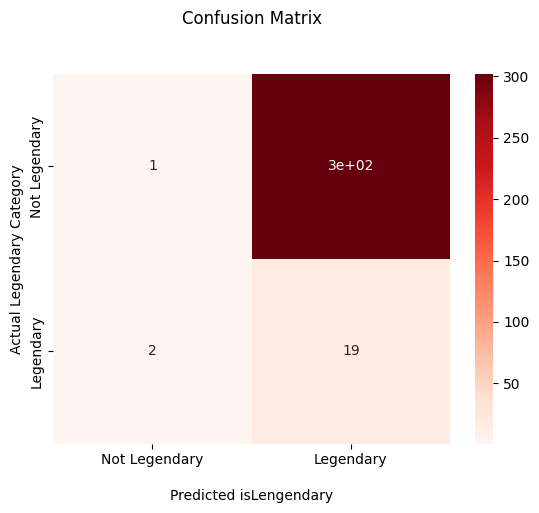

/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Cross-Validation accuracy: 0.498 +/- 0.437



--------ARCH3--------
Fold:  1, Training/Test Split Distribution: [303  21], Accuracy: 0.065
Weighted Precision: 0.00
Weighted Recall: 0.06
Weighted F1-score: 0.01
TP: 0
FN: 303
FP: 0
TN: 21
Specificity: 1.0
Sensitivity: 0.0
The AUC is: 0.5


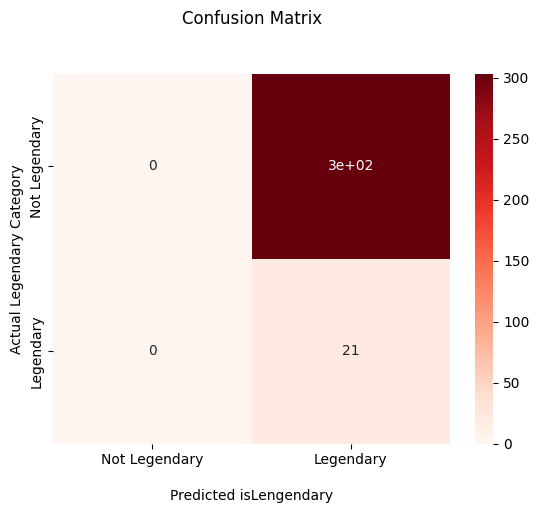

Fold:  2, Training/Test Split Distribution: [303  21], Accuracy: 0.704
Weighted Precision: 0.94
Weighted Recall: 0.69
Weighted F1-score: 0.77
TP: 203
FN: 100
FP: 2
TN: 19
Specificity: 0.08558558558558559
Sensitivity: 0.66996699669967
The AUC is: 0.7873644507307873


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


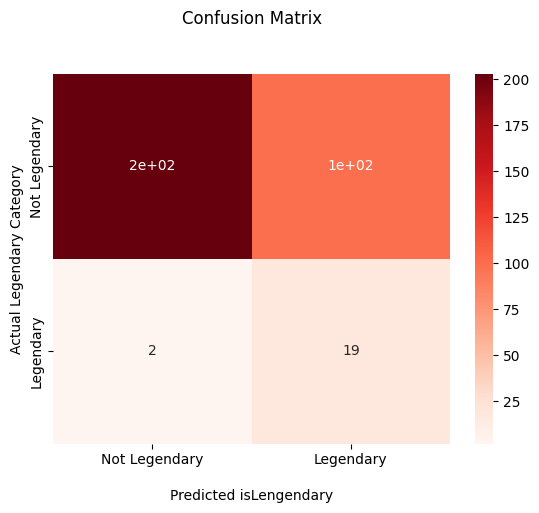

/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Cross-Validation accuracy: 0.384 +/- 0.319

--------ARCH4--------
Fold:  1, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


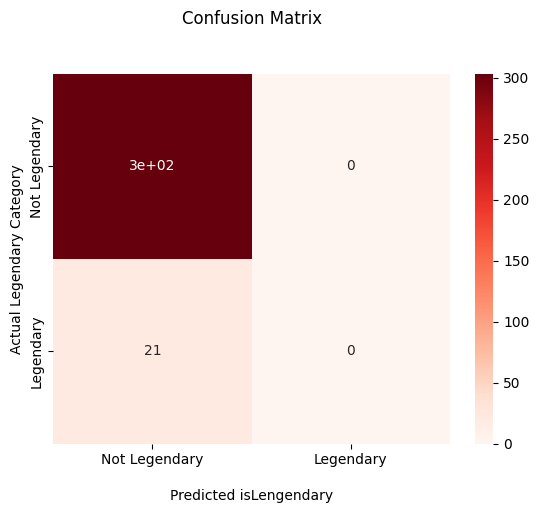

Fold:  2, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


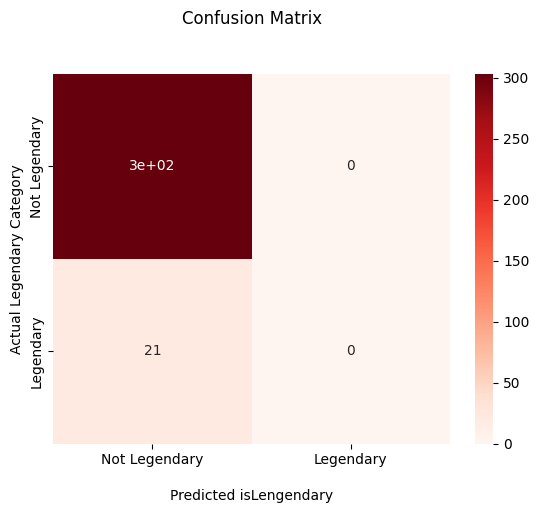



Cross-Validation accuracy: 0.935 +/- 0.000



--------ARCH5--------
Fold:  1, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


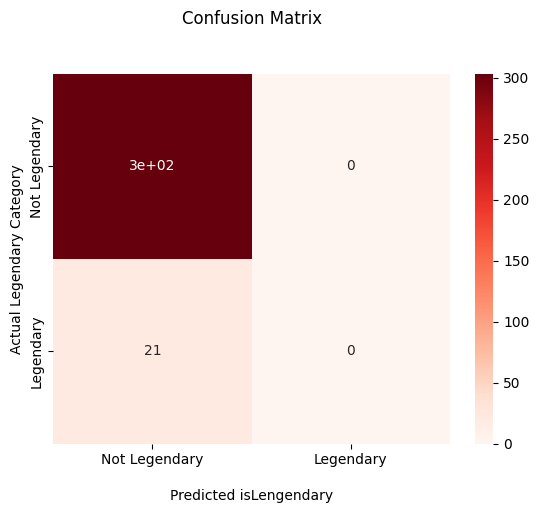

/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


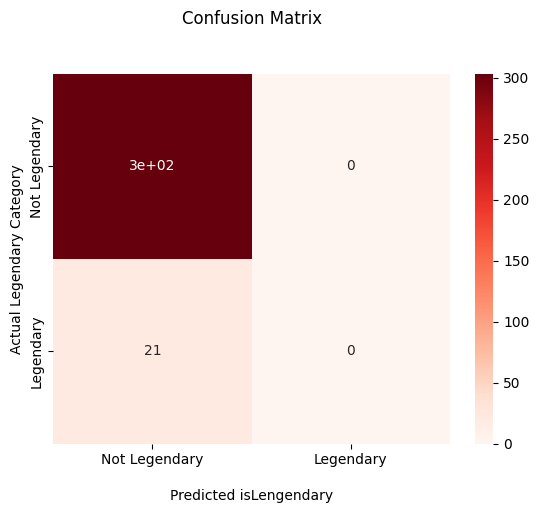



Cross-Validation accuracy: 0.935 +/- 0.000



--------ARCH6--------
Fold:  1, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


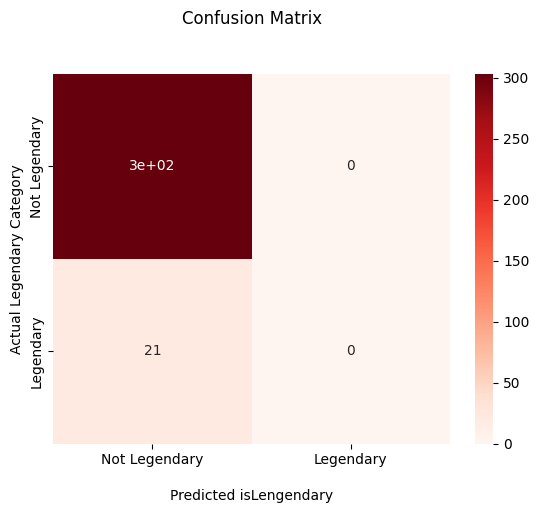

Fold:  2, Training/Test Split Distribution: [303  21], Accuracy: 0.935
Weighted Precision: 0.87
Weighted Recall: 0.94
Weighted F1-score: 0.90
TP: 303
FN: 0
FP: 21
TN: 0
Specificity: 0.0
Sensitivity: 1.0
The AUC is: 0.5


/home/ratiq/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ratiq/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


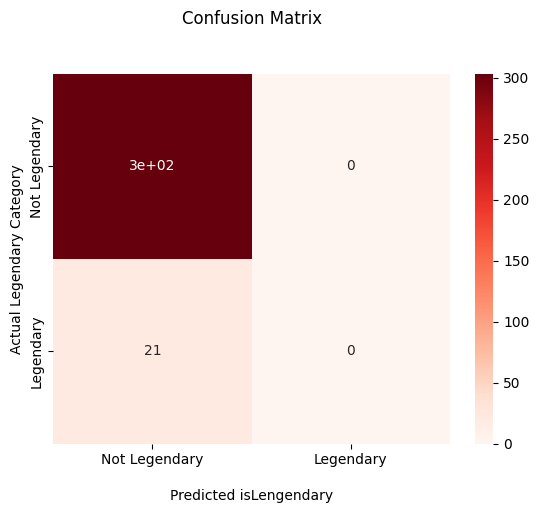



Cross-Validation accuracy: 0.935 +/- 0.000





In [51]:
from sklearn.neural_network import MLPClassifier

# architecture 1
# 2 hidden layers, 2 neurons in each, 0.1 learning rate, 1 epoch, relu, optimization algo = adam
print("--------ARCH1--------")
arch1 = MLPClassifier(hidden_layer_sizes=(2, 2), max_iter= 1, learning_rate_init=0.1)
cross_val_arch(2,arch1)
print()
print()

# architecture 2
# 3 hidden layers, 6,2,5 neurons in each, 0.01 learning rate, 1 epoch, tanh, optimization algo = adam
print("--------ARCH2--------")
arch2 = MLPClassifier(hidden_layer_sizes=(6, 2, 5), max_iter=1, learning_rate_init=0.01, activation='tanh')
cross_val_arch(2,arch2)
print()
print()

# architecture 3
# 4 hidden layers, 4,6,7,2 neurons, 0.001 learning rate, 10 epochs, relu and adam
print("--------ARCH3--------")
arch3 = MLPClassifier(hidden_layer_sizes=(4,6,7,2), max_iter=10, learning_rate_init=0.001)
cross_val_arch(2,arch3)


# architecture 4
# 3 hidden layers, 9,5,1 neurons, 0.1 learning rate, 100 epochs, relu and sgd
print("--------ARCH4--------")
arch4 = MLPClassifier(hidden_layer_sizes=(9,5,1), learning_rate_init=0.1, max_iter=100, solver = 'sgd')
cross_val_arch(2,arch4)
print()
print()

#architecture 5
# 2 hidden layers, 8, 2 neurons, 0.01 lr, 100 epochs, logistic and sgd
print("--------ARCH5--------")
arch5 = MLPClassifier(hidden_layer_sizes=(8,2), learning_rate_init=0.1, max_iter=100, activation='logistic', solver= 'sgd')
cross_val_arch(2,arch5)
print()
print()

#architecture 6
# 4 hidden layers, 1,2,3,4 neurons, 0.1 lr, 10 epochs, logistic, sgd
print("--------ARCH6--------")
arch6 = MLPClassifier(hidden_layer_sizes=(1,2,3,4), learning_rate_init=0.1, max_iter=10, activation='logistic', solver='sgd')
cross_val_arch(2,arch6)
print()
print()


## Evaluating Best Arch

Architecture 4 is the best - 3 hidden layers, 9,5,1 neurons, 0.1 learning rate, 100 epochs, relu and sgd

In [52]:
# testing classifiers
X_train, X_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size=0.3, random_state=10)
# classifier 1
arch4 = arch4.fit(X_train, y_train)
score = arch4.score(X_test, y_test)
print("Accuracy of the first classifier:", score)

Accuracy of the first classifier: 0.9447004608294931


>1, train: 1.000, test: 0.977
>2, train: 0.984, test: 0.986
>3, train: 0.990, test: 0.977
>4, train: 0.976, test: 0.986
>5, train: 0.978, test: 0.982
>6, train: 0.978, test: 0.977
>7, train: 0.976, test: 0.968
>8, train: 0.976, test: 0.977
>9, train: 0.976, test: 0.968
>10, train: 0.974, test: 0.968
>11, train: 0.974, test: 0.959
>12, train: 0.978, test: 0.968
>13, train: 0.978, test: 0.963
>14, train: 0.978, test: 0.963
>15, train: 0.974, test: 0.963
>16, train: 0.976, test: 0.963
>17, train: 0.974, test: 0.959
>18, train: 0.972, test: 0.959
>19, train: 0.974, test: 0.959
>20, train: 0.972, test: 0.959
>21, train: 0.972, test: 0.954
>22, train: 0.972, test: 0.954
>23, train: 0.980, test: 0.959
>24, train: 0.970, test: 0.963
>25, train: 0.974, test: 0.968
>26, train: 0.976, test: 0.977
>27, train: 0.980, test: 0.968
>28, train: 0.976, test: 0.968
>29, train: 0.974, test: 0.972
>30, train: 0.972, test: 0.968
>31, train: 0.972, test: 0.972
>32, train: 0.974, test: 0.963
>33, train: 0.976

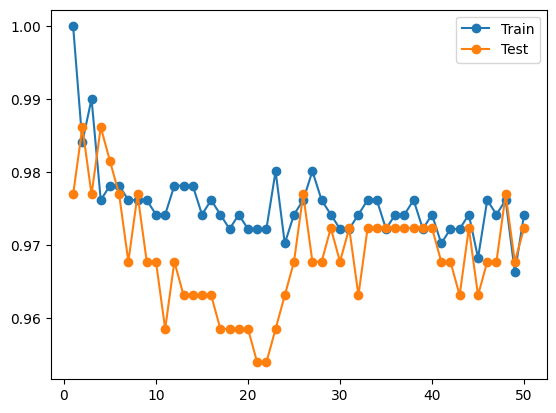

In [53]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [54]:
# classifier 2
# adding 30% of training to testing
X_train, splitX, y_train, splity=train_test_split(X_train, y_train, test_size = 0.3, random_state=10)
X_test = pd.concat([X_test, splitX])
y_test = pd.concat([y_test, splity])

arch4 = arch4.fit(X_train, y_train)
score = arch4.score(X_test, y_test)
print("Accuracy of the second classifier:", score)



Accuracy of the second classifier: 0.9512195121951219


>1, train: 1.000, test: 0.961
>2, train: 0.989, test: 0.967
>3, train: 0.989, test: 0.954
>4, train: 0.974, test: 0.954
>5, train: 0.977, test: 0.961
>6, train: 0.974, test: 0.961
>7, train: 0.969, test: 0.961
>8, train: 0.972, test: 0.980
>9, train: 0.974, test: 0.974
>10, train: 0.977, test: 0.980
>11, train: 0.977, test: 0.980
>12, train: 0.977, test: 0.980
>13, train: 0.969, test: 0.961
>14, train: 0.969, test: 0.961
>15, train: 0.966, test: 0.954
>16, train: 0.966, test: 0.961
>17, train: 0.966, test: 0.954
>18, train: 0.966, test: 0.961
>19, train: 0.966, test: 0.954
>20, train: 0.966, test: 0.961
>21, train: 0.966, test: 0.954
>22, train: 0.966, test: 0.954
>23, train: 0.966, test: 0.947
>24, train: 0.969, test: 0.947
>25, train: 0.966, test: 0.941
>26, train: 0.966, test: 0.941
>27, train: 0.966, test: 0.934
>28, train: 0.966, test: 0.941
>29, train: 0.966, test: 0.934
>30, train: 0.966, test: 0.934
>31, train: 0.966, test: 0.934
>32, train: 0.966, test: 0.934
>33, train: 0.966

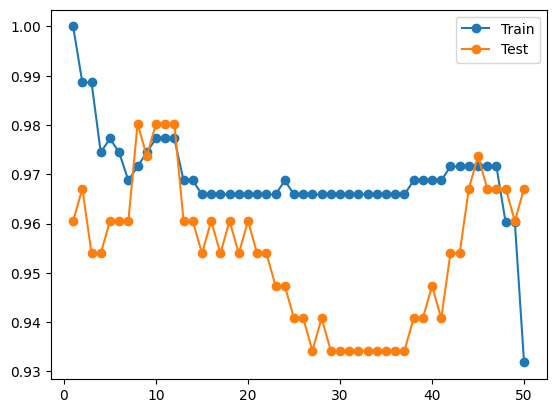

In [55]:
# define lists to collect scores
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(splitX)
	test_acc = accuracy_score(splity, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [56]:
# classifier 3
# adding another 30% of training to testing
X_train, splitX, y_train, splity=train_test_split(X_train, y_train, test_size = 0.3, random_state=10)
X_test = pd.concat([X_test, splitX])
y_test = pd.concat([y_test, splity])

arch4 = arch4.fit(X_train, y_train)
score = arch4.score(X_test, y_test)
print("Accuracy of the third classifier:", score)

Accuracy of the third classifier: 0.9452631578947368


>1, train: 1.000, test: 0.943
>2, train: 0.988, test: 0.953
>3, train: 0.984, test: 0.962
>4, train: 0.967, test: 0.962
>5, train: 0.967, test: 0.953
>6, train: 0.967, test: 0.972
>7, train: 0.967, test: 0.972
>8, train: 0.967, test: 0.972
>9, train: 0.972, test: 0.962
>10, train: 0.967, test: 0.962
>11, train: 0.967, test: 0.981
>12, train: 0.976, test: 0.981
>13, train: 0.963, test: 0.981
>14, train: 0.967, test: 0.991
>15, train: 0.963, test: 0.991
>16, train: 0.963, test: 0.991
>17, train: 0.959, test: 0.991
>18, train: 0.959, test: 0.991
>19, train: 0.959, test: 0.981
>20, train: 0.959, test: 0.981
>21, train: 0.959, test: 0.981
>22, train: 0.959, test: 0.981
>23, train: 0.959, test: 0.981
>24, train: 0.959, test: 0.991
>25, train: 0.959, test: 0.981
>26, train: 0.959, test: 0.991
>27, train: 0.959, test: 0.991
>28, train: 0.967, test: 0.991
>29, train: 0.963, test: 0.991
>30, train: 0.951, test: 0.981
>31, train: 0.955, test: 0.981
>32, train: 0.951, test: 0.991
>33, train: 0.951

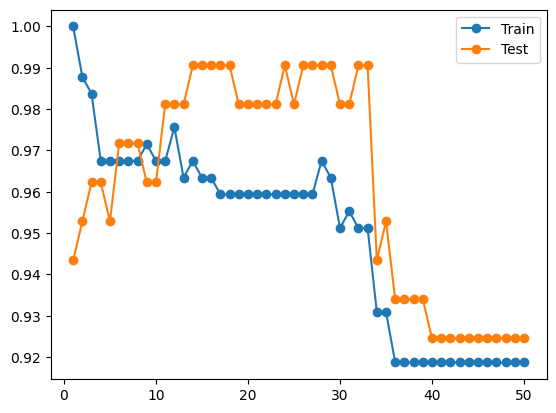

In [57]:
# define lists to collect scores
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(splitX)
	test_acc = accuracy_score(splity, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### Conclusions about tuning parameters of the multilayer perceptron

The best-identified architecture was number 4, which consisted of 3 hidden layers, 9,5,1 neurons, 0.1 learning rate, 100 epochs, relu and sgd. 

Hidden layer 

lower amount of hidden layers performed better. Hidden layers allow for the function of a neural network to be broken down into specific transformations of data. The number of hidden neurons in each new hidden layer equals the number of connections to be made. so, when increasing the number of hidden layers more than the required number of layers will cause accuracy in the test set to decrease.

Epoch

Higher the epoch the better the results we get but too many epochs may cause the model to over-fit the training data. It means that your model does not learn the data, it memorizes the data

Solver

It specifies the algorithm for weight optimization over the nodes, and we found that the "sgd" which refers to stochastic gradient descent performs the best. But the improvement is noted to not be justifiable for the time taken


## Conclusions about overfitting
We observe that classifiers 1 and 2 are overfitting because the model performs better on the training set rather than the test set. However, classifier 3 actually does not overfit, because of the larger (90% - 10%) train-test split provided.

### Conclusions about tuning parameters of the multilayer perceptron
The best-identified architecture was number 4, which consisted of 3 hidden layers, 9,5,1 neurons, 0.1 learning rate, 100 epochs, relu and sgd. 
